In [ ]:
# Run this cell once if you're using Google Colab
!pip install seaborn matplotlib pandas numpy


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [25]:
from google.colab import files
uploaded = files.upload()


Saving titanic.csv to titanic.csv


In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Enable inline plotting
%matplotlib inline


In [27]:
df = pd.read_csv('titanic.csv')  # Must match the file name exactly

print("Shape:", df.shape)
print("\nFirst 5 Rows:\n", df.head())


Shape: (887, 8)

First 5 Rows:
    Survived  Pclass                                               Name  \
0         0       3                             Mr. Owen Harris Braund   
1         1       1  Mrs. John Bradley (Florence Briggs Thayer) Cum...   
2         1       3                              Miss. Laina Heikkinen   
3         1       1        Mrs. Jacques Heath (Lily May Peel) Futrelle   
4         0       3                            Mr. William Henry Allen   

      Sex   Age  Siblings/Spouses Aboard  Parents/Children Aboard     Fare  
0    male  22.0                        1                        0   7.2500  
1  female  38.0                        1                        0  71.2833  
2  female  26.0                        0                        0   7.9250  
3  female  35.0                        1                        0  53.1000  
4    male  35.0                        0                        0   8.0500  


In [28]:
# Load the uploaded CSV file
df = pd.read_csv('titanic.csv')  # Make sure the file name is correct

# Show number of rows and columns
print("Shape of dataset:", df.shape)

# View column names and data types
print("\nData Types:\n")
print(df.dtypes)

# Check for missing values in each column
print("\nMissing Values:\n")
print(df.isnull().sum())


Shape of dataset: (887, 8)

Data Types:

Survived                     int64
Pclass                       int64
Name                        object
Sex                         object
Age                        float64
Siblings/Spouses Aboard      int64
Parents/Children Aboard      int64
Fare                       float64
dtype: object

Missing Values:

Survived                   0
Pclass                     0
Name                       0
Sex                        0
Age                        0
Siblings/Spouses Aboard    0
Parents/Children Aboard    0
Fare                       0
dtype: int64


In [29]:
df.head()  # shows the top 5 rows of the dataset


,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,0,3,Mr. Owen Harris Braund,male,22.0,1,0,7.2500
1,1,1,Mrs. John Bradley (Florence Briggs Thayer) Cum...,female,38.0,1,0,71.2833
2,1,3,Miss. Laina Heikkinen,female,26.0,0,0,7.9250
3,1,1,Mrs. Jacques Heath (Lily May Peel) Futrelle,female,35.0,1,0,53.1000
4,0,3,Mr. William Henry Allen,male,35.0,0,0,8.0500


In [ ]:
!pip install openpyxl  # needed for reading .xlsx files


In [30]:
# Summary of numerical and categorical features
df.describe(include='all')


,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
count,887.000000,887.000000,887,887,887.000000,887.000000,887.000000,887.00000
unique,NaN,NaN,887,2,NaN,NaN,NaN,NaN
top,NaN,NaN,Mr. Patrick Dooley,male,NaN,NaN,NaN,NaN
freq,NaN,NaN,1,573,NaN,NaN,NaN,NaN
mean,0.385569,2.305524,NaN,NaN,29.471443,0.525366,0.383315,32.30542
std,0.487004,0.836662,NaN,NaN,14.121908,1.104669,0.807466,49.78204
min,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,0.00000
25%,0.000000,2.000000,NaN,NaN,20.250000,0.000000,0.000000,7.92500
50%,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,14.45420
75%,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,31.13750


In [32]:
# Fill missing Age with median
df['Age'].fillna(df['Age'].median(), inplace=True)

# Fill missing Embarked with mode
# df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True) # Removed this line

# Optional: If Cabin is not useful, drop it
# df.drop('Cabin', axis=1, inplace=True)

# Recheck missing values
df.isnull().sum()

/tmp/ipython-input-32-3460060541.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].median(), inplace=True)


,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,0
Siblings/Spouses Aboard,0
Parents/Children Aboard,0
Fare,0


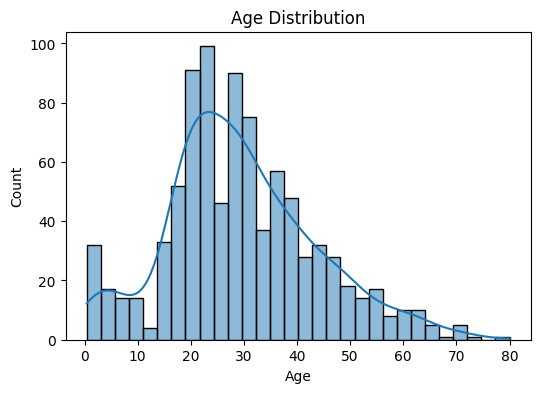

In [33]:
plt.figure(figsize=(6, 4))
sns.histplot(df['Age'], bins=30, kde=True)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()


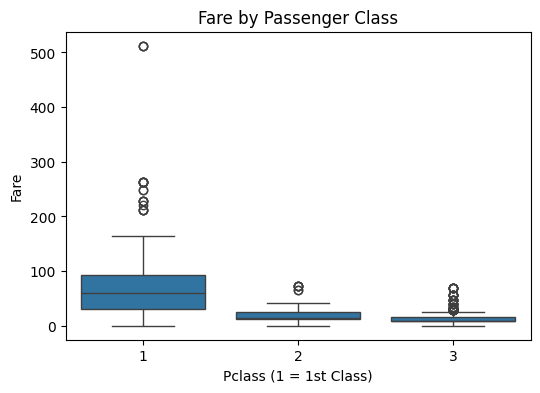

In [34]:
plt.figure(figsize=(6, 4))
sns.boxplot(x='Pclass', y='Fare', data=df)
plt.title('Fare by Passenger Class')
plt.xlabel('Pclass (1 = 1st Class)')
plt.ylabel('Fare')
plt.show()


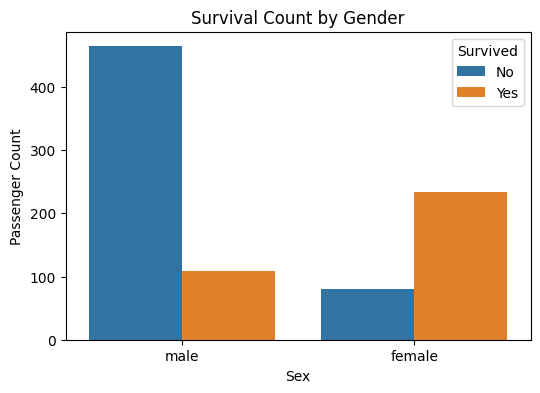

In [35]:
plt.figure(figsize=(6, 4))
sns.countplot(x='Sex', hue='Survived', data=df)
plt.title('Survival Count by Gender')
plt.xlabel('Sex')
plt.ylabel('Passenger Count')
plt.legend(title='Survived', labels=['No', 'Yes'])
plt.show()


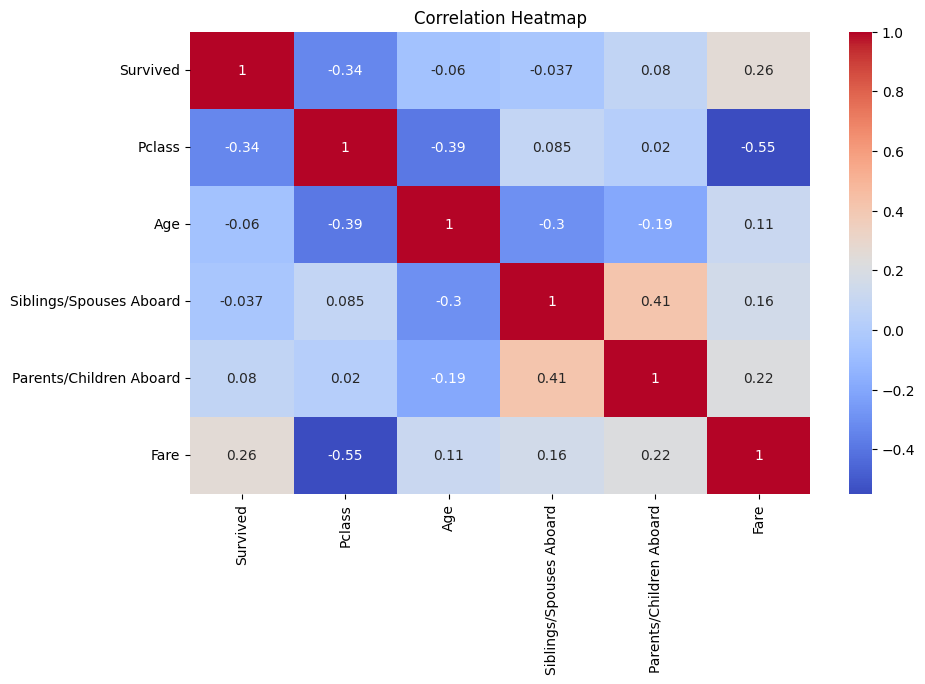

In [36]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()


In [37]:
pd.crosstab(df['Pclass'], df['Survived'], normalize='index') * 100


Survived,0,1
Pclass,,
1,37.037037,62.962963
2,52.717391,47.282609
3,75.564682,24.435318


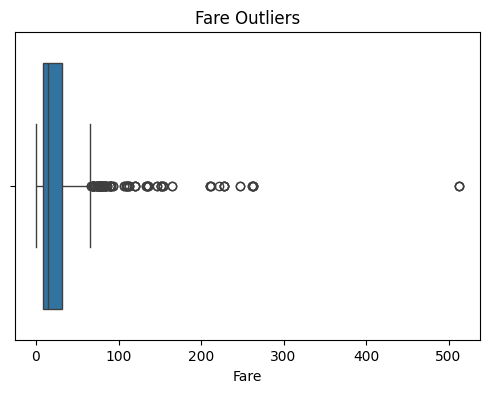

In [38]:
plt.figure(figsize=(6, 4))
sns.boxplot(x=df['Fare'])
plt.title("Fare Outliers")
plt.show()


In [39]:
from scipy import stats
z_scores = np.abs(stats.zscore(df['Fare']))

# Filter outliers: Z > 3
outliers = df[z_scores > 3]
print(f"Number of Fare Outliers: {len(outliers)}")


Number of Fare Outliers: 20


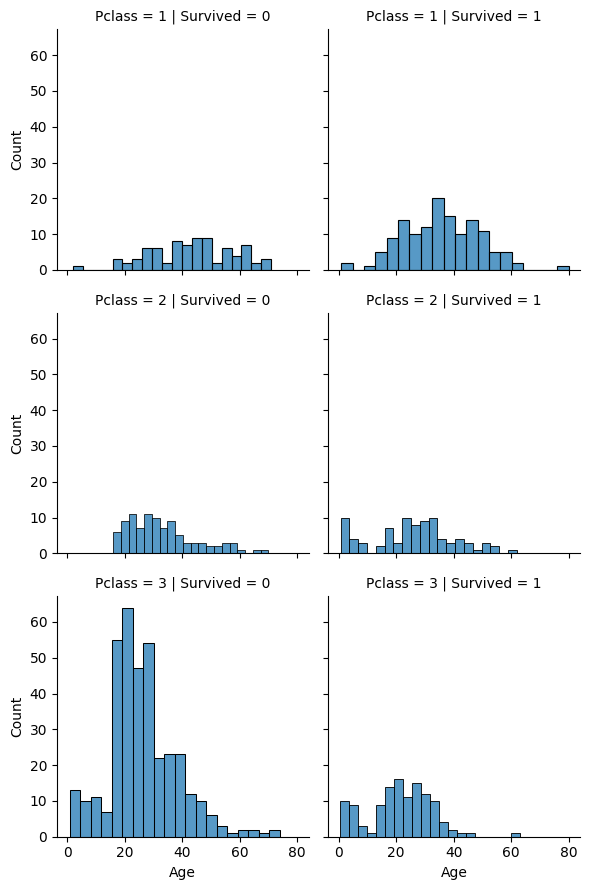

In [40]:
g = sns.FacetGrid(df, row='Pclass', col='Survived', height=3)
g.map(sns.histplot, 'Age', bins=20)
plt.show()


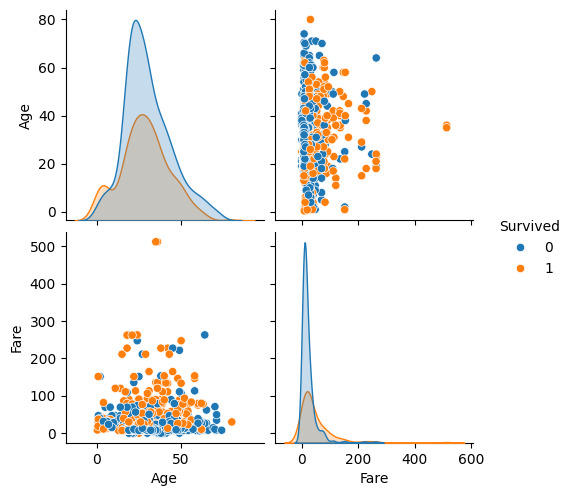

In [42]:
sns.pairplot(df[['Age', 'Fare', 'Survived']], hue='Survived')
plt.show()